In this example, scaling is not applied to model.

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir("C:/Users/gulte/Desktop/AI Exercises/Challenge_2")

In [15]:
df_raw = pd.read_excel("brainBodyWeight.xlsx",sep=" ",header=None)
cols = ["Index","BrainWeight","BodyWeight"]
df_s = pd.DataFrame(columns=["Index","BrainWeight","BodyWeight"])
for i in range(df_raw.shape[0]):
    x = df_raw.loc[i].tolist()[0].split(" ")
    y = [a for a in x if a!=""]
    y = pd.Series(y,index = cols)
    df_s = df_s.append(y,ignore_index=True)

In [16]:
df_s["BrainWeight"] = df_s["BrainWeight"].astype(float)
df_s["BodyWeight"] = df_s["BodyWeight"].astype(float)

In [17]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        62 non-null     object 
 1   BrainWeight  62 non-null     float64
 2   BodyWeight   62 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [18]:
df = df_s.set_index(df_s.columns[0])
df

,BrainWeight,BodyWeight
Index,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5
...,...,...
58,160.000,169.0
59,0.900,2.6
60,1.620,11.4


In [19]:
testX = df.iloc[:10,:1]
testY = df.iloc[:10,1:]
trainX = df.iloc[10:,:1]
trainY = df.iloc[10:,1:]

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
reg.coef_

array([[0.96507623]])

In [33]:
y_pred = reg.predict(testX)
y_pred

array([[105.21666507],
       [102.41311862],
       [103.25273494],
       [550.71032899],
       [137.01110147],
       [128.64389055],
       [116.26196252],
       [102.95356131],
       [105.99355143],
       [102.36003943]])

In [34]:
mean_squared_error(y_pred,testY)

5843.2310376290025

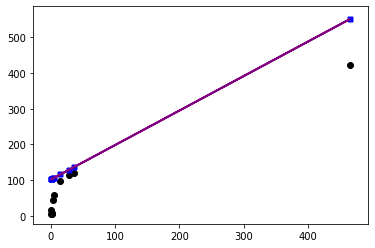

In [40]:
plt.scatter(testX,testY,color="black")
plt.plot(testX,y_pred,color="purple",linewidth=2)
plt.scatter(testX,y_pred,color="blue",marker = "+",linewidth=5)